### 영화 목록

In [12]:
import requests  ###서버에 요청을 할떄 쓰는 모듈.
import lxml.html #xml 방식으로 파싱할떄 쓰이는 모듈 
import datetime as dt
url= "https://movie.daum.net/boxoffice/yearly?year=2018"
# 유저 에이전트
res = requests.get(url, headers = {
    'user-agent': ('Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) '
                   'Chrome/41.0.2228.0 Safari/537.36')})
res.status_code

200

In [13]:
# HTML 소스 가져오기
html = res.text   ####아까 content와 같은 응답내용이지만 text형식으로 표현됨.
html

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="ko" class="os_windows chrome pc version_41_0_2228_0">\n<head>\n<meta charset="utf-8">\n<meta property="og:site_name" content="Daum 영화">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<!-- <title>$tagfilter.filter($stringCutUtil.cutStringRealLength($tmp, $len, "..")) - Daum 영화</title> -->\n<title>Daum 영화</title>\n\n\t\t\t<meta property="og:title" content="이번주 박스오피스 1위는?">\r\n\t\t\t\t\r\n\t\t<meta property="og:image" content="http://t1.daumcdn.net/movie/common/og_default.png">\r\n\t\t\t\t<meta property="og:description" content="Daum영화에서 자세한 내용을 확인하세요!">\r\n\t\t\t\r\n\t<meta name="plink" content=""/>\r\n    <meta property="dg:plink" content=""/>\r\n\t<meta property="article:mobile_view_url" content="" /> <!-- mobile -->\r\n\t<meta property="article:pc_view_url" content="" /> <!-- pc -->\r\n\t<meta property="article:mobile_url" content="" /> <!-- mobile -->\r\n\t<meta property="article:pc_url" content="" /> <!-- pc -->\

In [14]:
e = lxml.html.fromstring(res.content) ####파싱하는  모듈 (분석)
e

<Element html at 0x25187364098>

In [15]:
title = e.cssselect('#mArticle .\#title') #css 선택자로 title이라는 태그를 가진
#노드에 해당하는 내용을 가져옴.

In [16]:
title

[<Element a at 0x25187364598>,
 <Element a at 0x251873644f8>,
 <Element a at 0x25187364228>,
 <Element a at 0x25187364638>,
 <Element a at 0x25187364688>,
 <Element a at 0x251873645e8>,
 <Element a at 0x251873646d8>,
 <Element a at 0x25187364728>,
 <Element a at 0x25187364778>,
 <Element a at 0x251873647c8>,
 <Element a at 0x25187364818>,
 <Element a at 0x25187364868>,
 <Element a at 0x251873648b8>,
 <Element a at 0x25187364908>,
 <Element a at 0x25187364958>,
 <Element a at 0x251873649a8>,
 <Element a at 0x251873649f8>,
 <Element a at 0x25187364a48>,
 <Element a at 0x25187364a98>,
 <Element a at 0x25187364ae8>,
 <Element a at 0x25187364b38>,
 <Element a at 0x25187364b88>,
 <Element a at 0x25187364bd8>,
 <Element a at 0x25187364c28>,
 <Element a at 0x25187364c78>,
 <Element a at 0x25187364cc8>,
 <Element a at 0x25187364d18>,
 <Element a at 0x25187364d68>,
 <Element a at 0x25187364db8>,
 <Element a at 0x25187364e08>,
 <Element a at 0x25187364e58>,
 <Element a at 0x25187364ea8>,
 <Elemen

In [17]:
title_l = list()
for i in title:
    title_l.append(i.text)
title_l

['신과함께-인과 연',
 '어벤져스: 인피니티 워',
 '보헤미안 랩소디',
 '미션 임파서블: 폴아웃',
 '신과함께-죄와 벌',
 '쥬라기 월드: 폴른 킹덤',
 '앤트맨과 와스프',
 '안시성',
 '블랙 팬서',
 '완벽한 타인',
 '1987',
 '독전',
 '공작',
 '베놈',
 '암수살인',
 '데드풀 2',
 '국가부도의 날',
 '코코',
 '아쿠아맨',
 '그것만이 내 세상',
 '마녀',
 '탐정: 리턴즈',
 '인크레더블 2',
 '서치',
 '너의 결혼식',
 '곤지암',
 '지금 만나러 갑니다',
 '목격자',
 '조선명탐정: 흡혈괴마의 비밀',
 '신비한 동물들과 그린델왈드의 범죄',
 '메이즈 러너: 데스 큐어',
 '맘마미아!2',
 '레디 플레이어 원',
 '명당',
 '협상',
 '마약왕',
 '쥬만지: 새로운 세계',
 '창궐',
 '성난황소',
 '도어락',
 '리틀 포레스트',
 '골든슬럼버',
 '램페이지',
 '궁합',
 '오션스8',
 '사라진 밤',
 '스윙키즈',
 '바람 바람 바람',
 'PMC: 더 벙커',
 '범블비']

### 영화 데이터셋

In [18]:
score_l = list()
genre_l = list()
showdate_l = list()
totalnum_l = list()


for i in title:
    url_s ='https://movie.daum.net' + i.get('href')
    #print(url_s)
    res_s = requests.get(url_s, headers = {
    'user-agent': ('Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) '
                   'Chrome/41.0.2228.0 Safari/537.36')})
    e_s = lxml.html.fromstring(res_s.content)
    score = e_s.cssselect('.subject_movie .emph_grade')
    genre = e_s.cssselect('.txt_main')
    try:
        score_l.append(float(score[0].text))
        genre_l.append(genre[0].text)
        showdate_l.append(dt.datetime.strptime(genre[1].text.strip()[:10], '%Y.%m.%d'))
    except:
        score_l.append(0)
        genre_l.append('Null')
        showdate_l.append(dt.date(2018, 1, 1))
        
    url_t = url_s[:35]+'/totalAudience.json'+url_s[35:]
    #print(url_t)
    res_t = requests.post(url_t)
    try:
        totalnum_l.append(int(res_t.json()['totalAudience'].replace(',','')))
    except:
        totalnum_l.append(0)

In [23]:
import pandas as pd
movie_data = {'title': title_l, 'showdate': showdate_l, 'score' : score_l, 'totalNum' : totalnum_l, 'genre' : genre_l}
movie_list = pd.DataFrame(data=movie_data)
movie_list

,title,showdate,score,totalNum,genre
0,신과함께-인과 연,2018-08-01,6.8,12276115,판타지/드라마
1,어벤져스: 인피니티 워,2018-04-25,7.6,11212710,액션/SF/어드벤처/판타지
2,보헤미안 랩소디,2018-10-31,8.9,9942266,드라마
3,미션 임파서블: 폴아웃,2018-07-25,8.1,6584919,액션/스릴러
4,신과함께-죄와 벌,2017-12-20,7.0,14411675,드라마
5,쥬라기 월드: 폴른 킹덤,2018-06-06,7.1,5661128,액션/어드벤처/SF
6,앤트맨과 와스프,2018-07-04,7.4,5448134,액션/어드벤처/SF
7,안시성,2018-09-19,7.7,5441020,시대극/액션
8,블랙 팬서,2018-02-14,6.1,5399303,액션/SF/드라마
9,완벽한 타인,2018-10-31,7.4,5294119,코미디/드라마


In [24]:
movie_list = movie_list.drop(15) # 데이터가 누락되어있어서 제거

In [26]:
movie_list

,title,showdate,score,totalNum,genre
0,신과함께-인과 연,2018-08-01,6.8,12276115,판타지/드라마
1,어벤져스: 인피니티 워,2018-04-25,7.6,11212710,액션/SF/어드벤처/판타지
2,보헤미안 랩소디,2018-10-31,8.9,9942266,드라마
3,미션 임파서블: 폴아웃,2018-07-25,8.1,6584919,액션/스릴러
4,신과함께-죄와 벌,2017-12-20,7.0,14411675,드라마
5,쥬라기 월드: 폴른 킹덤,2018-06-06,7.1,5661128,액션/어드벤처/SF
6,앤트맨과 와스프,2018-07-04,7.4,5448134,액션/어드벤처/SF
7,안시성,2018-09-19,7.7,5441020,시대극/액션
8,블랙 팬서,2018-02-14,6.1,5399303,액션/SF/드라마
9,완벽한 타인,2018-10-31,7.4,5294119,코미디/드라마


### 전처리 및 분석

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [260]:
movie_list.corr(method='pearson')

,score,totalNum
score,1.000000,0.280274
totalNum,0.280274,1.000000


C:\Users\CHAEBIN\AppData\Local\conda\conda\envs\ml_scratch\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


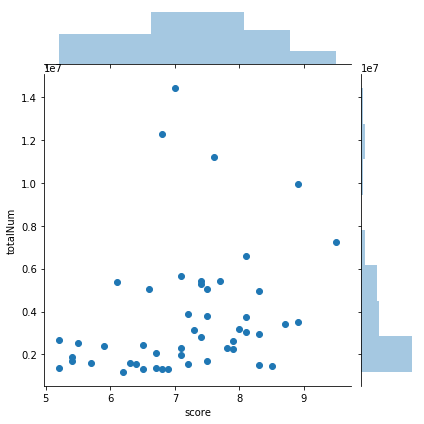

In [228]:
sns.jointplot(x='score', y='totalNum', data=movie_list, kind='scatter')

평점과 누적관객수는 약한 양의 상관관계를 보인다.

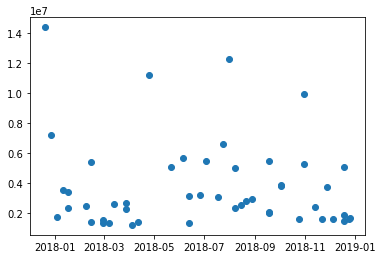

In [250]:
plt.plot_date(movie_list['showdate'], movie_list['totalNum'])

## 미세먼지

### 기상청 온도 데이터

In [266]:
temp_air = pd.read_csv('tempair.csv', encoding='CP949')
temp_air.head()

,일시,평균기온,최고기온
0,2019-01-01,-5.0,-0.6
1,2019-01-02,-4.9,0.2
2,2019-01-03,-3.5,3.2
3,2019-01-04,-1.1,4.1
4,2019-01-05,-2.8,1.1


In [267]:
temp_air.set_index('일시', inplace = True)
temp_air.rename({'평균기온':'temp_avg', '최고기온':'temp_high'}, axis = 'columns', inplace = True)
temp_air.head()

,temp_avg,temp_high
일시,,
2019-01-01,-5.0,-0.6
2019-01-02,-4.9,0.2
2019-01-03,-3.5,3.2
2019-01-04,-1.1,4.1
2019-01-05,-2.8,1.1


In [94]:
#temp_air['일시'].apply(lambda x: dt.date(int(x[:4]),int(x[5:7]),int(x[8:10])))
#type(temp_air['일시'][0])

### 미세먼지 데이터

In [180]:
dust = pd.read_csv('dust_amount.csv')
dust.head()

,Unnamed: 0,dataTime,so2Value,coValue,o3Value,no2Value,pm10Value,khaiValue,khaiGrade,so2Grade,coGrade,o3Grade,no2Grade,pm10Grade
0,1,2019-03-02 2:00,0.005,1.3,0.017,0.060,110,273,4,1,1,1,2,3
1,2,2019-03-02 1:00,0.005,1.2,0.019,0.063,114,302,4,1,1,1,3,3
2,3,2019-03-02 0:00,0.005,1.1,0.023,0.060,106,281,4,1,1,1,2,3
3,4,2019-03-01 23:00,0.005,1.2,0.029,0.054,120,285,4,1,1,1,2,3
4,5,2019-03-01 22:00,0.005,1.2,0.050,0.035,126,281,4,1,1,2,2,3


In [181]:
dust['date'] = dust['dataTime'].map(lambda x: x[:10])
dust.head()

,Unnamed: 0,dataTime,so2Value,coValue,o3Value,no2Value,pm10Value,khaiValue,khaiGrade,so2Grade,coGrade,o3Grade,no2Grade,pm10Grade,date
0,1,2019-03-02 2:00,0.005,1.3,0.017,0.060,110,273,4,1,1,1,2,3,2019-03-02
1,2,2019-03-02 1:00,0.005,1.2,0.019,0.063,114,302,4,1,1,1,3,3,2019-03-02
2,3,2019-03-02 0:00,0.005,1.1,0.023,0.060,106,281,4,1,1,1,2,3,2019-03-02
3,4,2019-03-01 23:00,0.005,1.2,0.029,0.054,120,285,4,1,1,1,2,3,2019-03-01
4,5,2019-03-01 22:00,0.005,1.2,0.050,0.035,126,281,4,1,1,2,2,3,2019-03-01


In [182]:
dust = dust.groupby(['date']).mean()
dust = dust[['pm10Value']]
dust.head()

,pm10Value
date,
2018-12-30,35.333333
2018-12-31,31.166667
2019-01-01,44.625000
2019-01-02,32.083333
2019-01-03,33.750000


In [103]:
#dust = dust[['date','pm10Value']].sort_values('date')
#dust.set_index('date', inplace=True)

### 네이버 미세먼지 검색량

In [122]:
dust_search = pd.read_excel('dust_naver.xlsx')
dust_search.head()

,날짜,미세먼지
0,2018-12-30,2.49485
1,2018-12-31,4.73330
2,2019-01-01,4.43181
3,2019-01-02,3.42209
4,2019-01-03,5.13553


In [123]:
dust_search.set_index('날짜', inplace = True)
dust_search.rename({'미세먼지':'search'}, axis = 'columns', inplace = True)
dust_search.head()

,search
날짜,
2018-12-30,2.49485
2018-12-31,4.73330
2019-01-01,4.43181
2019-01-02,3.42209
2019-01-03,5.13553


### 트위터 (공기, 마스크) 중복 언급량

In [29]:
#from twitterscraper import logging
from twitterscraper import main
from twitterscraper import query
from twitterscraper import tweet
import pandas as pd
import codecs, json
from twitterscraper import query_tweets

In [30]:
from __future__ import division
import random
import requests
import datetime as dt
import json
from functools import partial
from multiprocessing.pool import Pool

from twitterscraper.tweet import Tweet
#from twitterscraper.logging import logger

In [31]:
list_of_tweets = query_tweets("마스크 공기", begindate = dt.date(2018,12,30), enddate=dt.date(2019,3,3), poolsize =50, lang = 'ko')


INFO: queries: ['마스크 공기 since:2018-12-30 until:2018-12-31', '마스크 공기 since:2018-12-31 until:2019-01-01', '마스크 공기 since:2019-01-01 until:2019-01-02', '마스크 공기 since:2019-01-02 until:2019-01-04', '마스크 공기 since:2019-01-04 until:2019-01-05', '마스크 공기 since:2019-01-05 until:2019-01-06', '마스크 공기 since:2019-01-06 until:2019-01-07', '마스크 공기 since:2019-01-07 until:2019-01-09', '마스크 공기 since:2019-01-09 until:2019-01-10', '마스크 공기 since:2019-01-10 until:2019-01-11', '마스크 공기 since:2019-01-11 until:2019-01-12', '마스크 공기 since:2019-01-12 until:2019-01-14', '마스크 공기 since:2019-01-14 until:2019-01-15', '마스크 공기 since:2019-01-15 until:2019-01-16', '마스크 공기 since:2019-01-16 until:2019-01-17', '마스크 공기 since:2019-01-17 until:2019-01-19', '마스크 공기 since:2019-01-19 until:2019-01-20', '마스크 공기 since:2019-01-20 until:2019-01-21', '마스크 공기 since:2019-01-21 until:2019-01-22', '마스크 공기 since:2019-01-22 until:2019-01-24', '마스크 공기 since:2019-01-24 until:2019-01-25', '마스크 공기 since:2019-01-25 until:2019-01-26', '마스크 공기 since:20

In [32]:
text = []
time = []

In [33]:
for i in range(len(list_of_tweets)) :
    text += [{"text" : list_of_tweets[i].text}]
    time += [{"time" : list_of_tweets[i].timestamp}]

In [34]:
text_df = pd.DataFrame(text)
time_df = pd.DataFrame(time)

tweet_list = pd.concat([text_df,time_df],axis=1)

In [35]:
tweet_list.sort_values('time')

,text,time
1184,يا رحمن يا رحيم ياربpic.twitter.com/THF3P69nAG,2018-12-16 03:02:39
1547,Ezen Onlar Ezilen Biz \nKerbela da Kesilen Biz...,2018-12-18 19:16:35
1185,| VIDEO | @BTS_twt\n\n¿Se acuerdan de este Com...,2018-12-19 03:00:05
1186,Pq,2018-12-19 13:08:44
1549,i'm really cryingpic.twitter.com/VI8BmZtIzs,2018-12-21 08:14:23
1548,"Amazing, a beautiful story",2018-12-21 17:59:36
1546,http://bit.ly/2PVzc1G Concepción del Uruguay:...,2018-12-22 08:42:39
266,La transición fue de mentira. La constitución ...,2018-12-27 10:35:41
265,ちょあぴエアライン作って\nそして私を予約センターで雇用して(？),2018-12-27 10:44:21
264,,2018-12-27 11:55:54


In [163]:
tweet_list['date'] = tweet_list['time'].map(lambda x: x.strftime('%Y-%m-%d'))
tweet_list.head()

,text,time,date
0,(소매를 뒤적거리더니 손수건을 하나 꺼낸다) 마스크는 없으니까 이거라도 받아. 갑자...,2019-01-30 14:05:29,2019-01-30
1,그나마 대청소 했어서 곳곳에 흙이나 자재들 쌓여있고 화장실 몇개 못쓰는 정도긴 한데...,2019-01-30 14:04:32,2019-01-30
2,환상체명 : 테오도르\n식별 코드 : @IHateMonday04\n등급 : WAW\...,2019-01-30 10:20:14,2019-01-30
3,#welcomejacksontothailand 슨아 여기 공기 안좋아 ㅠ ㅠ마스크 ...,2019-01-30 08:16:03,2019-01-30
4,공기 안좋은데 마스크 두고 나왔다ㅠㅜㅜ,2019-01-30 04:48:16,2019-01-30


In [170]:
dust_tweet = tweet_list.groupby(['date']).count()
dust_tweet = dust_tweet[['time']]
dust_tweet.rename({'time':'tweet_count'}, axis = 'columns', inplace = True)
dust_tweet.head()

,tweet_count
date,
2018-12-19,2
2018-12-20,2
2018-12-21,1
2018-12-23,1
2018-12-30,8


### 데이터셋만들기

In [268]:
dust_pd1 = pd.merge(temp_air, dust, left_index=True, right_index=True)
dust_pd2 = pd.merge(dust_pd1, dust_search, left_index=True, right_index=True)
dust_pd = pd.merge(dust_pd2, dust_tweet, left_index=True, right_index=True)
dust_pd

,temp_avg,temp_high,pm10Value,search,tweet_count
2019-01-01,-5.0,-0.6,44.625000,4.43181,13
2019-01-02,-4.9,0.2,32.083333,3.42209,3
2019-01-03,-3.5,3.2,33.750000,5.13553,6
2019-01-04,-1.1,4.1,39.041667,9.59779,19
2019-01-05,-2.8,1.1,65.416667,13.31462,18
2019-01-06,-2.8,2.7,49.416667,8.42241,11
2019-01-07,-1.9,3.1,40.375000,9.41368,9
2019-01-08,-3.5,0.5,51.875000,8.50705,6
2019-01-09,-4.7,1.3,37.583333,5.80144,9
2019-01-10,-0.6,3.0,47.916667,8.86834,5


### 상관관계 분석

In [38]:
print(dust_pd.corr(method='pearson'))

NameError: name 'dust_pd' is not defined

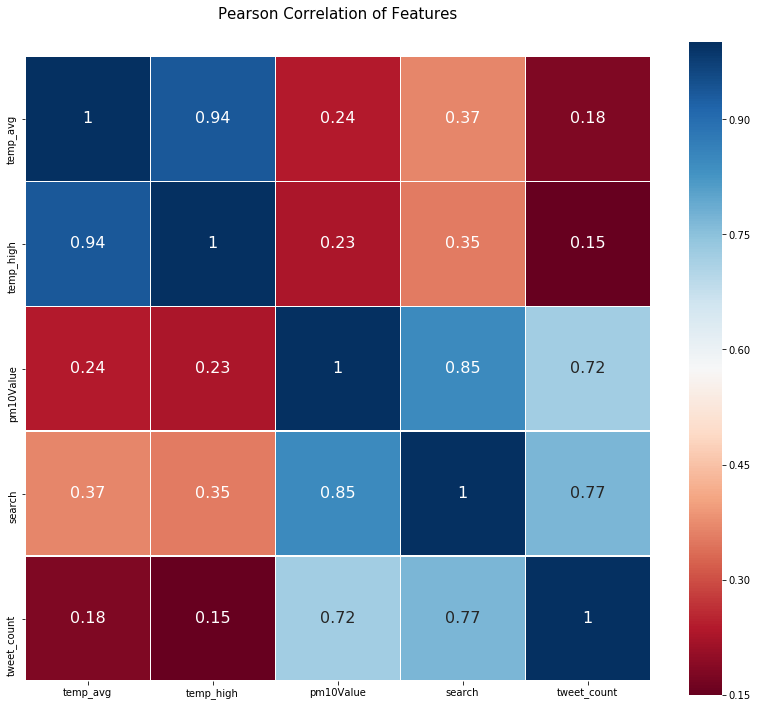

In [270]:
heatmap_data = dust_pd
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
